In [1]:
import lightgbm as lgb

In [2]:
import pandas as pd
from matplotlib import  pyplot
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pylab as plt

In [8]:
data = pd.read_csv("data_final_xj_new.csv")

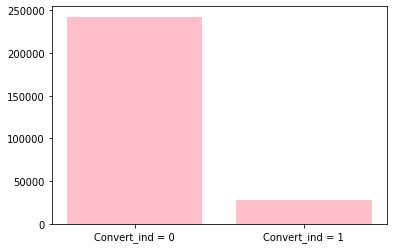

In [19]:

import matplotlib.pyplot as plt
cd = data['convert_ind']
# a = len(cd == 0)
# b = len(cd == 1)
name_list = ['Convert_ind = 0','Convert_ind = 1']


a = 242355 
b = 27846  
num_list = [a,b]
plt.bar(range(len(num_list)), num_list,color='pink',tick_label=name_list)
plt.show()

In [18]:
sum(data['convert_ind'] == 1)

27846

In [12]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,360945,360946,360947,360948,360949,360950,360951,360952,360953,360954
discount,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Home_policy_ind,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
quoted_amt,12321,12321,12321,12321,12321,12321,12321,12321,12321,12321,...,11819,11819,11819,11819,11819,11819,11819,11819,11819,11819
Prior_carrier_grp,5,5,5,5,5,5,5,5,5,5,...,8,8,8,8,8,8,8,8,8,8
CAT_zone,5,5,5,5,5,5,5,5,5,5,...,4,4,4,4,4,4,4,4,4,4
number_drivers,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
convert_ind,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
split,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,...,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train
year,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,...,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016
month,11,11,11,11,11,11,11,11,11,11,...,8,8,8,8,8,8,8,8,8,8


In [13]:
# data = data.drop(['Unnamed: 0'], axis = 1)
# data = data.drop(['policy_id'], axis = 1)

In [5]:
sum(data['convert_ind']==1)

27846

In [14]:
train = data[data['split']=='Train']
test = data[data['split']=='Test']
train = train.drop(['split'], axis=1)
test = test.drop(['split'], axis=1)

In [15]:
train_target1 = train['convert_ind']
train_features1 = train.drop(['convert_ind'], axis=1)
test_features = test.drop(['convert_ind'], axis=1)

In [16]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.datasets import make_classification
ros = RandomOverSampler(random_state=0)
train_features, train_target = ros.fit_sample(train_features1, train_target1)
sorted(Counter(train_target).items())

[(0.0, 242355), (1.0, 242355)]

In [17]:
def split_folds(data):
    """
    data : array
    output : every factor in folds contains a train set and a validation set
    """
    # split the data into five folds
    nFolds = 5

    folds = []

    numSamples = data.shape[0]
    numLeaveOutPerFold = numSamples // nFolds

    for i in range(nFolds):
        
        startInd = i * numLeaveOutPerFold
        endInd = min((i + 1) * numLeaveOutPerFold, numSamples)

        frontPart = data.iloc[:startInd, :]
        midPart = data.iloc[startInd : endInd, :]
        rearPart = data.iloc[endInd:, :]


#         foldData = np.concatenate([frontPart, rearPart], axis=0)
        foldData = frontPart.append(rearPart)
        foldInfo = {
            'train_x' : foldData.drop(['convert_ind'], axis=1),
            'train_y' : foldData['convert_ind'],
            'valid_x' : midPart.drop(['convert_ind'], axis=1),
            'valid_y' : midPart['convert_ind']
        }

        folds.append(foldInfo)

    return folds

In [18]:
# from sklearn.utils import shuffle
split_data = split_folds(train)

In [19]:
X_test = split_data[2]['valid_x']
y_test = split_data[2]['valid_y']

In [20]:
lgb_train = lgb.Dataset(train_features, train_target)
lgb_eval = lgb.Dataset(X_test,y_test, reference=lgb_train)
# params = {
#         'task': 'train',
#         'boosting_type': 'gbdt',
#         'objective': 'binary',
#         'metric': {'l2', 'auc'},
#         'num_leaves': 31,
#         'learning_rate': 0.05,
#         'feature_fraction': 0.9,
#         'bagging_fraction': 0.9,
#         'bagging_freq': 1,
#         'verbose': 50
#         }
        
# params = {
#         'task': 'train',
#         'boosting_type': 'gbdt',
#         'objective': 'binary',
#         'metric': {'l2', 'auc'},
#         'num_leaves': 33,#
#         'max_bin':295,
#         'learning_rate': 0.053,
#         'feature_fraction': 0.4,#
#         'min_data_in_leaf':21,
#         'num_iteration':100,
#         'bagging_fraction': 0.7,#
#         'bagging_freq': 5,
#         'verbose': 0
#         }

params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': {'l2', 'auc'},
        'num_leaves': 33,
        'max_bin':295,
        'learning_rate': 0.03,
        'feature_fraction': 0.4,
        'min_data_in_leaf':16,
        'num_iteration':100,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'verbose': 0
        }
gbm = lgb.train(params,lgb_train,num_boost_round=130,valid_sets=lgb_eval,early_stopping_rounds=31)#fix 130 31
        

[1]	valid_0's l2: 0.249929	valid_0's auc: 0.600723
Train until valid scores didn't improve in 31 rounds.
[2]	valid_0's l2: 0.250642	valid_0's auc: 0.612303
[3]	valid_0's l2: 0.250543	valid_0's auc: 0.624342
[4]	valid_0's l2: 0.250408	valid_0's auc: 0.656598
[5]	valid_0's l2: 0.249836	valid_0's auc: 0.672809
[6]	valid_0's l2: 0.249633	valid_0's auc: 0.669448
[7]	valid_0's l2: 0.249366	valid_0's auc: 0.673499
[8]	valid_0's l2: 0.249239	valid_0's auc: 0.682493
[9]	valid_0's l2: 0.248664	valid_0's auc: 0.68889
[10]	valid_0's l2: 0.248783	valid_0's auc: 0.689281
[11]	valid_0's l2: 0.248666	valid_0's auc: 0.687693
[12]	valid_0's l2: 0.248548	valid_0's auc: 0.688057
[13]	valid_0's l2: 0.248277	valid_0's auc: 0.692048
[14]	valid_0's l2: 0.247827	valid_0's auc: 0.694769
[15]	valid_0's l2: 0.247762	valid_0's auc: 0.695932
[16]	valid_0's l2: 0.247164	valid_0's auc: 0.700358
[17]	valid_0's l2: 0.247081	valid_0's auc: 0.699507
[18]	valid_0's l2: 0.246324	valid_0's auc: 0.702464
[19]	valid_0's l2: 0

<Figure size 864x432 with 0 Axes>

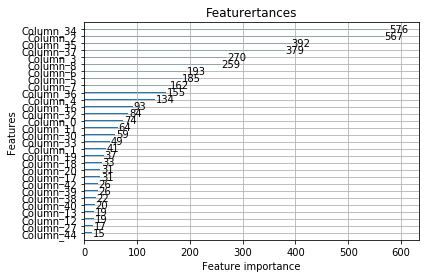

In [40]:
plt.figure(figsize=(12,6))
lgb.plot_importance(gbm, max_num_features=30)
plt.title("Featurertances")
plt.show()

In [31]:
feature_names = data.columns.values.tolist()

In [24]:
def plot_importance(booster, ax=None, height=0.2,
                    xlim=None, ylim=None, title='Feature importance',
                    xlabel='Feature importance', ylabel='Features',
                    importance_type='split', max_num_features=None,
                    ignore_zero=True, figsize=None, dpi=None, grid=True,
                    precision=3, **kwargs):
    if MATPLOTLIB_INSTALLED:
        import matplotlib.pyplot as plt
    else:
        raise ImportError('You must install matplotlib to plot metric.')

    if isinstance(booster, LGBMModel):
        eval_results = deepcopy(booster.evals_result_)
    elif isinstance(booster, dict):
        eval_results = deepcopy(booster)
    else:
        raise TypeError('booster must be dict or LGBMModel.')

    num_data = len(eval_results)

    if not num_data:
        raise ValueError('eval results cannot be empty.')

    if ax is None:
        if figsize is not None:
            _check_not_tuple_of_2_elements(figsize, 'figsize')
        _, ax = plt.subplots(1, 1, figsize=figsize, dpi=dpi)

    if dataset_names is None:
        dataset_names = iter(eval_results.keys())
    elif not isinstance(dataset_names, (list, tuple, set)) or not dataset_names:
        raise ValueError('dataset_names should be iterable and cannot be empty')
    else:
        dataset_names = iter(dataset_names)

    name = next(dataset_names)  # take one as sample
    metrics_for_one = eval_results[name]
    num_metric = len(metrics_for_one)
    if metric is None:
        if num_metric > 1:
            msg = """more than one metric available, picking one to plot."""
            warnings.warn(msg, stacklevel=2)
        metric, results = metrics_for_one.popitem()
    else:
        if metric not in metrics_for_one:
            raise KeyError('No given metric in eval results.')
        results = metrics_for_one[metric]
    num_iteration, max_result, min_result = len(results), max(results), min(results)
    x_ = range_(num_iteration)
    ax.plot(x_, results, label=name)

    for name in dataset_names:
        metrics_for_one = eval_results[name]
        results = metrics_for_one[metric]
        max_result, min_result = max(max(results), max_result), min(min(results), min_result)
        ax.plot(x_, results, label=name)

    ax.legend(loc='best')

    if xlim is not None:
        _check_not_tuple_of_2_elements(xlim, 'xlim')
    else:
        xlim = (0, num_iteration)
    ax.set_xlim(xlim)

    if ylim is not None:
        _check_not_tuple_of_2_elements(ylim, 'ylim')
    else:
        range_result = max_result - min_result
        ylim = (min_result - range_result * 0.2, max_result + range_result * 0.2)
    ax.set_ylim(ylim)

    if ylabel == 'auto':
        ylabel = metric

    if title is not None:
        ax.set_title(title)
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    ax.grid(grid)
    return ax

In [61]:
# from sklearn.model_selection import train_test_split,cross_val_score
# x_train,x_test,y_train,y_test=train_test_split(train_features,train_target,test_size=0.4,random_state=1)

# lgb_train = lgb.Dataset(x_train, y_train)
# lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)
# params = {
#         'task': 'train',
#         'boosting_type': 'gbdt',
#         'objective': 'binary',
#         'metric': {'l2', 'auc'},
#         'max_depth':7,
#         'num_leaves': 31,
#         'feature_fraction': 0.8,
#         'min_data_in_leaf':20,
#         'bagging_fraction': 0.9
#         }
# gbm = lgb.train(params,lgb_train,valid_sets=lgb_eval,early_stopping_rounds=31)#fix 130 31

# y_pred = gbm.predict(test_features, num_iteration=gbm.best_iteration)
# # y_pred = np.array(y_pred)
# # y_test = np.array(y_test)
# # auc = roc_auc_score(y_test, y_pred)
# # print('this is AUC:')
# # print(auc)
# y_pred

In [62]:
# gbm = lgb.train(params,lgb_train,num_boost_round=100,valid_sets=lgb_eval,early_stopping_rounds=200)

In [63]:
y_pred = gbm.predict(test_features, num_iteration=gbm.best_iteration)

In [64]:
y_pred

array([0.30234982, 0.31126222, 0.30234982, ..., 0.26378833, 0.25836321,
       0.26860529])

In [65]:
predict_test = y_pred

In [66]:
predicttest = pd.DataFrame(predict_test)
predicttest = predicttest.rename(columns = {0:'conv_prob'})
predicttest

,conv_prob
0,0.302350
1,0.311262
2,0.302350
3,0.302350
4,0.311262
...,...
90749,0.260564
90750,0.263371
90751,0.263788
90752,0.258363


In [67]:
policy = []
for i in test_features['policy_id']:
    
    policy.append('policy_'+str(i))
    
import numpy as np
policy = np.array(policy)
policy = pd.DataFrame(policy)
policy = policy.rename(columns = {0:'policy_id'})
policy

,policy_id
0,policy_6
1,policy_6
2,policy_6
3,policy_6
4,policy_6
...,...
90749,policy_99982
90750,policy_99982
90751,policy_99982
90752,policy_99982


In [68]:
policy_convert = policy.join(predicttest)
policy_convert

,policy_id,conv_prob
0,policy_6,0.302350
1,policy_6,0.311262
2,policy_6,0.302350
3,policy_6,0.302350
4,policy_6,0.311262
...,...,...
90749,policy_99982,0.260564
90750,policy_99982,0.263371
90751,policy_99982,0.263788
90752,policy_99982,0.258363


In [69]:
df_mean = policy_convert.groupby('policy_id')['conv_prob'].mean()
predict_all = pd.DataFrame(df_mean)

In [70]:
predict_all

,conv_prob
policy_id,
policy_10001,0.434756
policy_10047,0.593760
policy_10049,0.177850
policy_10051,0.473039
policy_10052,0.595466
...,...
policy_99960,0.440436
policy_99966,0.378690
policy_99973,0.412911


In [71]:
predict_all.to_csv("result_LGBM_12_5_new.csv",index=True,sep=',')